In [1]:
import pandas as pd

# 1. Load CSV files
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.shape

(891, 12)

In [6]:
### 3. Missing Value Analysis

# Calculate total number of missing values per column
missing = train.isnull().sum()

# Filter columns with missing values and sort in descending order
missing = missing[missing > 0].sort_values(ascending=False)

# Calculate missing value percentages
missing_percent = (missing / len(train)) * 100

# Create a DataFrame with count and percentage of missing values
missing_table = pd.DataFrame({
    'MissingCount': missing,
    'MissingPercent': missing_percent.round(2)
}).sort_values(by='MissingPercent', ascending=False)

# Display the summary table of missing values
missing_table

,MissingCount,MissingPercent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22


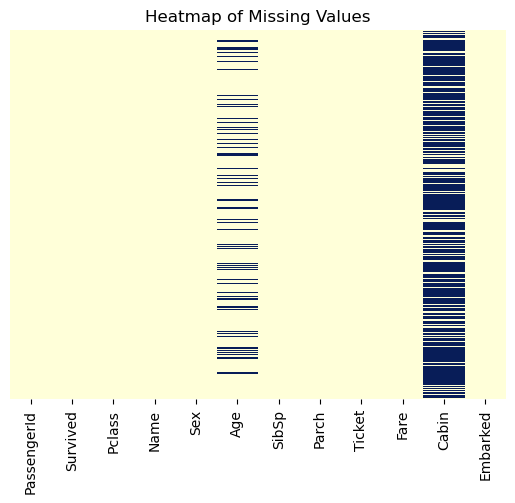

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='YlGnBu')
plt.title("Heatmap of Missing Values")
plt.show()

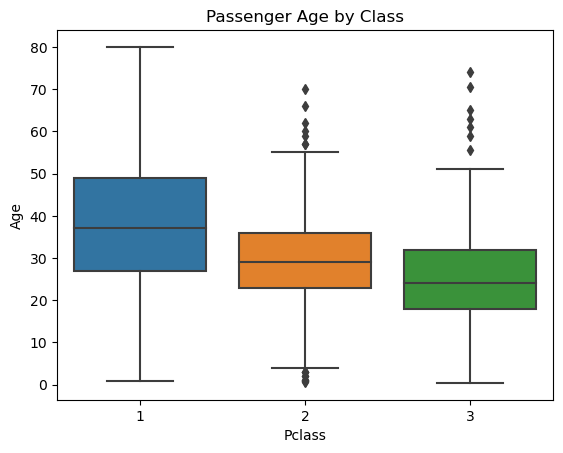

In [8]:
# Visualizing the relationship between Passenger Class and Age to guide age imputationplt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=train)
plt.title("Passenger Age by Class")
plt.show()

In [9]:
# Define a function to fill in missing Age values based on passenger class
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    # If Age is missing, return the median age based on the passenger class
    if pd.isnull(Age):
        if Pclass == 1:
            return 37  # Median age for 1st class
        elif Pclass == 2:
            return 29  # Median age for 2nd class
        else:
            return 24  # Median age for 3rd class
    else:
        return Age  # If Age is not missing, return the original value

# Apply the function to the training dataset
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

In [10]:
# Drop the 'Cabin' column due to too many missing values
train.drop('Cabin', axis=1, inplace=True)

In [11]:
# Drop rows with any remaining missing values (e.g. in 'Embarked')
train.dropna(inplace=True)

In [12]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [14]:
# Encode the 'Sex' column: male → 0, female → 1
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})


In [15]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [16]:
# Create dummy variables for 'Embarked' and drop the first category (C)
embark = pd.get_dummies(train['Embarked'], drop_first=True)

# Add the dummy columns (Q and S) to the dataset
train = pd.concat([train, embark], axis=1)

# Drop the original 'Embarked' column
train.drop('Embarked', axis=1, inplace=True)

In [17]:
train['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [18]:
# Create dummy variables for 'Pclass' (no need for drop_first in this case)
classes = pd.get_dummies(train['Pclass'])

# Add the new class columns to the dataset
train = pd.concat([train, classes], axis=1)

# Drop the original 'Pclass' column
train.drop('Pclass', axis=1, inplace=True)

In [19]:
print(train.columns)

Index(['PassengerId',    'Survived',        'Name',         'Sex',
               'Age',       'SibSp',       'Parch',      'Ticket',
              'Fare',           'Q',           'S',             1,
                   2,             3],
      dtype='object')


In [20]:
# Rename Pclass dummy columns
train.rename(columns={
    1: 'Class_1',
    2: 'Class_2',
    3: 'Class_3'
}, inplace=True)

In [21]:
# Rename Embarked dummy columns
train.rename(columns={
    'Q': 'Embarked_Q',
    'S': 'Embarked_S'
}, inplace=True)

In [22]:
print(train.columns)

Index(['PassengerId', 'Survived', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked_Q', 'Embarked_S', 'Class_1', 'Class_2',
       'Class_3'],
      dtype='object')


In [23]:
train.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)


In [24]:
print(train.columns)

Index(['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q',
       'Embarked_S', 'Class_1', 'Class_2', 'Class_3'],
      dtype='object')


In [25]:
# Separate features and target variable
X = train.drop('Survived', axis=1)  # Features
y = train['Survived']               # Target


In [26]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on test set
y_pred = log_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8033707865168539

Confusion Matrix:
 [[89 20]
 [15 54]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84       109
           1       0.73      0.78      0.76        69

    accuracy                           0.80       178
   macro avg       0.79      0.80      0.80       178
weighted avg       0.81      0.80      0.80       178



In [29]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [30]:
# Predict on the validation test set
rf_pred = rf_model.predict(X_test)

# Evaluate the predictions
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))


Random Forest Accuracy: 0.7584269662921348

Confusion Matrix:
 [[83 26]
 [17 52]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.76      0.79       109
           1       0.67      0.75      0.71        69

    accuracy                           0.76       178
   macro avg       0.75      0.76      0.75       178
weighted avg       0.77      0.76      0.76       178



In [31]:
# Load test dataset
test = pd.read_csv("data/test.csv")

# Fill missing Age values based on Pclass
def impute_age2(cols):
    Age, Pclass = cols
    if pd.isnull(Age):
        return 37 if Pclass == 1 else 29 if Pclass == 2 else 24
    else:
        return Age

test['Age'] = test[['Age', 'Pclass']].apply(impute_age2, axis=1)

# Fill missing Fare with mean
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

# Save PassengerId for submission
passenger_ids = test['PassengerId']

# Drop Cabin column if present
test.drop(['Cabin'], axis=1, errors='ignore', inplace=True)

# Encode 'Sex'
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

# Encode 'Embarked'
embarked_dummies = pd.get_dummies(test['Embarked'], drop_first=True)
embarked_dummies.rename(columns={'Q': 'Embarked_Q', 'S': 'Embarked_S'}, inplace=True)
test = pd.concat([test, embarked_dummies], axis=1)

# Encode 'Pclass'
pclass_dummies = pd.get_dummies(test['Pclass'], prefix='Class')
test = pd.concat([test, pclass_dummies], axis=1)

# Drop unused original columns
test.drop(['Name', 'Ticket', 'Embarked', 'Pclass', 'PassengerId'], axis=1, errors='ignore', inplace=True)


In [32]:
# Add missing columns from training set (X) if any
for col in X.columns:
    if col not in test.columns:
        test[col] = 0  # Fill with 0

# Reorder columns to match training data
test = test[X.columns]


In [33]:
# Predict using the trained random forest model
predictions = rf_model.predict(test)

# Create submission DataFrame
submission = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': predictions
})

# Save to CSV
submission.to_csv('submission_rf.csv', index=False)
print("✅ submission_rf.csv created successfully!")


✅ submission_rf.csv created successfully!
